In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/semeval_2022/dontpatronizeme_v1.3

/content/drive/My Drive/semeval_2022/dontpatronizeme_v1.3


In [3]:
import pandas as pd
import numpy as np
import os
import re
import re
from bs4 import BeautifulSoup
import string

In [4]:
text=[]

In [5]:
yulia=pd.read_csv('./Ulmfit/Yulia_formatted_svo.csv')
vua=pd.read_csv('./Ulmfit/VUA_formatted.csv', encoding='latin-1')
trofi=pd.read_csv('./Ulmfit/TroFi_annotated.csv')
moh=pd.read_csv('./Ulmfit/MOH_formatted.csv')

In [6]:
trofi=trofi[trofi['human_label']=='metaphorical']
vua=vua[vua['label']==1]
yulia=yulia[yulia['label']==1]
moh=moh[moh['label']==1]

In [7]:
vua=vua['sentence']

In [8]:
res = []
for i in vua:
    if i not in res:
        res.append(i)

In [9]:
res

["He was President of FISA ( Federation Internationale des Societes d'Aviron ) , the world governing body , for 30 years ; and most of this body 's attitudes and practices reflect the force of his strict , but genial personality .",
 'Most athletes first encountered him as a voice , bellowing in multi-lingual fury at officials who had broken rules or arrangements designed to make racing safer or more fair .',
 'He did not loosen his links with the athletes when projected upwards into the Presidency .',
 'Provided their behaviour was sportsmanlike and safe , oarsmen found only encouragement and humour from a President who was always among them .',
 "Keller 's Zurich upbringing made him into a skiier and sculler , and he raced for the Grasshopper club .",
 'FISA was then a relatively unimportant body which organised European and other championships and participated in the running of Olympic regattas .',
 'As a rich , forceful young man , Keller had been earmarked as a likely future presi

In [10]:
text.extend(trofi['sentence'])
text.extend(res)
text.extend(yulia['sentence'])
text.extend(moh['sentence'])

In [11]:
len(text)

6567

In [12]:
td=[]

In [13]:
import json

with open('./Ulmfit/talkdown.tar/balanced_test.jsonl', 'r') as json_file:
    json_list = list(json_file)

for json_str in json_list:
    result = json.loads(json_str)
    if result['label']==True:
      td.append(result['post'])

In [14]:
len(td)

326

In [15]:
final_td=[]
for i in range(len(td)):
  s=re.sub('>','',td[i])
  s = re.sub('\n', '', s)
  #s=re.sub(r'[\]+','', s)
  final_td.append(s)


In [16]:
text.extend(final_td)

In [17]:
len(text)

6893

In [18]:
df=pd.DataFrame(text,columns=['text'])

In [19]:
df.to_csv('./Ulmfit/extra_text.csv',index=False)

In [ ]:
#########################################################FASTAI##############

In [ ]:
from fastai import *
from fastai.text import *
from sklearn.model_selection import train_test_split

In [ ]:
path=Path('./Ulmfit/')

In [ ]:
task1=pd.read_csv('task1_train.csv')
task1_t=pd.read_csv('task1_test.csv')

In [ ]:
task1=task1[task1.label!=0]
task1_t=task1_t[task1_t.label!=0]
task1=task1.reset_index()
task1_t=task1_t.reset_index()

In [ ]:
task1['text'] = task1['text'].apply(text_preprocessing_pipeline)
task1_t['text'] = task1_t['text'].apply(text_preprocessing_pipeline)

In [ ]:

task1=pd.concat([task1,task1_t])
#extra=pd.read_csv('./Ulmfit/extra_text.csv')
train_df=pd.read_csv('task2_train.csv')

In [ ]:
test_df=pd.read_csv('task2_test.csv')

In [ ]:
train_df['text'] = train_df['text'].apply(text_preprocessing_pipeline)
test_df['text'] = test_df['text'].apply(text_preprocessing_pipeline)

In [ ]:
lm_df=pd.concat([df,task1],join='inner')
lm_df=pd.concat([lm_df,train_df],join='inner')

In [ ]:
len(lm_df)

10478

In [ ]:
bs=48
data_lm = (TextList.from_df(lm_df, path, cols='text')
                .random_split_by_pct(0.1)
                .label_for_lm()
                .databunch(bs=bs))

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
data_lm.save('tmp_lm_wo_talkdown')

In [ ]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 1.74E-02


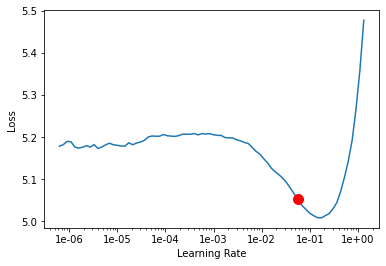

In [ ]:
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end=10,suggestion=True)
min_grad_lr = learn_lm.recorder.min_grad_lr

In [ ]:
min_grad_lr

0.05754399373371566

In [ ]:
learn_lm.fit_one_cycle(2,1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.431344,3.958996,0.299188,00:32
1,3.746979,3.794078,0.317505,00:32


In [ ]:
learn_lm.save('fit_head_wo_talkdown')

In [ ]:
learn_lm.load('fit_head_wo_talkdown')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (9431 items)
x: LMTextList
xxbos xxmaj company officials could n't be reached for xxunk , but xxmaj gary xxup p. xxmaj xxunk , who follows the industry for xxmaj xxunk & xxmaj co . , said he understood that cooling problems had developed that could delay delivery of the machine .,xxbos xxmaj xxunk makes building products , cooling xxunk and boots .,xxbos xxmaj the xxmaj nuclear xxmaj regulatory xxmaj commission xxunk xxmaj detroit xxmaj xxunk xxmaj co . $ 25 , 000 for the faulty design of a core cooling system at the xxmaj detroit - based xxunk 's xxmaj fermi 2 nuclear xxunk .,xxbos xxmaj in small type , the ad does state that just 5 , 800 of the xxunk million xxmaj americans will die this year of skin cancer and that ` ` odds are it wo n't be your xxunk . '',xxbos xxmaj about 25 % of those children die of xxunk cancer or xxunk .
y: LMLabelList
,,,,
Path: Ulmfit;

Valid: LabelList (1047 items)
x: LMTextList
xxbos xxmaj in those pa

In [ ]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.345426,3.669228,0.333712,00:39
1,3.158273,3.469469,0.368966,00:39
2,2.796429,3.222058,0.418074,00:39
3,2.337516,2.997560,0.473404,00:39
4,1.873370,2.845338,0.513041,00:39
5,1.538382,2.759723,0.545157,00:39
6,1.268158,2.712003,0.564394,00:39
7,1.104690,2.699121,0.576353,00:39
8,1.015002,2.690817,0.580195,00:39
9,0.967228,2.696630,0.580817,00:39


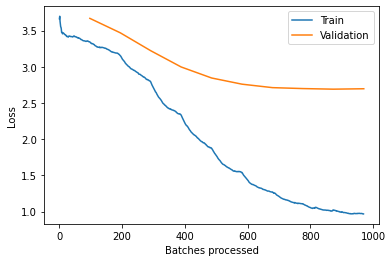

In [ ]:
learn_lm.recorder.plot_losses()

In [ ]:
learn_lm.save('fine_tuned_wo_talkdown')

In [ ]:
learn_lm.save_encoder('fine_tuned_enc_wo_talkdown')

In [ ]:
############################### Classifier####################

In [ ]:
target_cols=['upr','ss','ps','av','m','c','pm']
t=train_df[target_cols].values
t=t.tolist()

In [ ]:
ts=[]
for i in range(len(t)):
  s=[]
  for ind,j in enumerate(t[i]):
    if j==1:
      s.append(target_cols[ind])
  ts.append(s)


In [ ]:
train_df['label']=ts
train_df['liststring'] = [','.join(map(str, l)) for l in train_df['label']]

In [ ]:
df_train, df_val = train_test_split(train_df, train_df['liststring'], test_size = 0.15)

ValueError: ignored

In [ ]:
bs = 48
data_lm = load_data(path,'tmp_lm_wo_talkdown',bs=bs)
#data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [ ]:
def precision(log_preds, targs, thresh=0.5, epsilon=1e-8):
    pred_pos = (log_preds > thresh).float()
    tpos = torch.mul((targs == pred_pos).float(), targs.float())
    return (tpos.sum()/(pred_pos.sum() + epsilon))#.item()
def recall(log_preds, targs, thresh=0.5, epsilon=1e-8):
    pred_pos = (log_preds > thresh).float()
    tpos = torch.mul((targs == pred_pos).float(), targs.float())
    return (tpos.sum()/(targs.sum() + epsilon))

In [ ]:
data_clas = TextClasDataBunch.from_df(path, train_df=train_df, valid_df=test_df, 
                                  vocab=data_lm.vocab, 
                                  text_cols='text', 
                                  label_cols='liststring',
                                  label_delim=',',
                                  bs=bs)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
data_clas.save('tmp_clas_wo_talkdown')

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.metrics = [accuracy_thresh, precision, recall]
learn.load_encoder('fine_tuned_enc_wo_talkdown')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (794 items)
x: TextList
xxbos we also know that they can benefit by receiving counseling from someone who can help them understand that their feelings are normal and that their situation is not hopeless someone who can help them put their situation in perspective and help them communicate with others who could provide support someone xxunk about resources they can access someone who can help them plan for their needs and the needs of their child by developing either a parenting plan or an adoption plan,xxbos pope francis washed and kissed the feet of muslim orthodox hindu and catholic refugees in a moving ceremony during holy thursday mass at a refugee center on the outskirts of rome march,xxbos many refugees do nt want to be resettled anywhere let alone in the us,xxbos xxunk xxunk like fred xxunk and angela in the kitchen are either homeless or recently re xxunk and desperately in need of a helping hand to enable them to re build th

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 4.37E-02


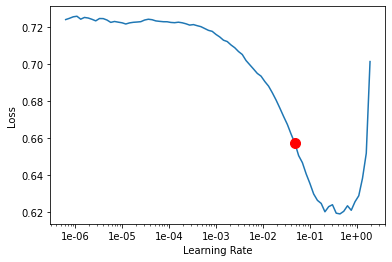

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
min_grad_lr

0.0478630092322638

In [ ]:
learn.freeze()
learn.fit_one_cycle(2, min_grad_lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,precision,recall,time
0,0.583500,0.445164,0.806892,0.838055,0.421195,00:03
1,0.493403,0.410629,0.816224,0.830402,0.476304,00:03


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
learn.save('first_factors_wo_talkdown')

In [ ]:
learn.load('first_factors_wo_talkdown')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (794 items)
x: TextList
xxbos we also know that they can benefit by receiving counseling from someone who can help them understand that their feelings are normal and that their situation is not hopeless someone who can help them put their situation in perspective and help them communicate with others who could provide support someone xxunk about resources they can access someone who can help them plan for their needs and the needs of their child by developing either a parenting plan or an adoption plan,xxbos pope francis washed and kissed the feet of muslim orthodox hindu and catholic refugees in a moving ceremony during holy thursday mass at a refugee center on the outskirts of rome march,xxbos many refugees do nt want to be resettled anywhere let alone in the us,xxbos xxunk xxunk like fred xxunk and angela in the kitchen are either homeless or recently re xxunk and desperately in need of a helping hand to enable them to re build th

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7), wd=0.1)

epoch,train_loss,valid_loss,accuracy_thresh,precision,recall,time
0,0.399369,0.423719,0.800431,0.779680,0.432134,00:03
1,0.397600,0.417322,0.812635,0.788431,0.452419,00:03
2,0.381152,0.419738,0.815506,0.800349,0.478064,00:03
3,0.360231,0.415043,0.817660,0.803306,0.494631,00:03


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
learn.save('second_factors_wo_talkdown')

In [ ]:
learn.load('second_factors_wo_talkdown')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (794 items)
x: TextList
xxbos we also know that they can benefit by receiving counseling from someone who can help them understand that their feelings are normal and that their situation is not hopeless someone who can help them put their situation in perspective and help them communicate with others who could provide support someone xxunk about resources they can access someone who can help them plan for their needs and the needs of their child by developing either a parenting plan or an adoption plan,xxbos pope francis washed and kissed the feet of muslim orthodox hindu and catholic refugees in a moving ceremony during holy thursday mass at a refugee center on the outskirts of rome march,xxbos many refugees do nt want to be resettled anywhere let alone in the us,xxbos xxunk xxunk like fred xxunk and angela in the kitchen are either homeless or recently re xxunk and desperately in need of a helping hand to enable them to re build th

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7), wd=0.1)

epoch,train_loss,valid_loss,accuracy_thresh,precision,recall,time
0,0.323578,0.415153,0.814788,0.809102,0.493660,00:07
1,0.318868,0.413333,0.819095,0.789416,0.490259,00:06
2,0.309594,0.413447,0.818378,0.781589,0.504631,00:06
3,0.306956,0.411710,0.823403,0.782360,0.506725,00:07


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
# Predict on the validation dataset
y_pred, y_true =  learn.get_preds()

In [ ]:
y_pred.size()

torch.Size([199, 7])

In [ ]:
####################################prediction#######

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
f1_score(y_true, y_pred>0.35, average='macro')

0.49894823656642817